In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
authors = pd.read_csv('authors_VideoMuseum.csv')

In [4]:
authors.head()

,Id artist,name,name extended,type,Birth year,Death year,Birth city,Birth state,Birth country,Death city,Death state,Death country,Gender,Nationality (original),ID artworks
0,380000000034856,& IL TOPO,Aujourd’hui & IL TOPO réunit : Armando della V...,groupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,groupe,NaN,380000000034695|380000000035465
1,6664664,(À L'EMBALLAGE DE CLÉMENTINE),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280000000115916
2,6663648,(D'APRÈS),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540000000000477|540000000000478|54000000000047...
3,6660426,(INSCRIPTIONS INTRAN STUDIO),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480000000000233
4,6660563,(PABLO PICASSO (D'APRÈS)),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000000001109|160000000105183|160000000105186


In [5]:
authors['Id artist'] = authors['Id artist'].astype(str)

## When an artist becomes 'French'?

In [309]:
len(authors[authors['Birth country'] == 'France'])

230

In [307]:
len(authors[authors['Nationality (original)'] == 'française'])

382

## Missing values

In [311]:
authors.shape

(927, 15)

In [10]:
authors['Birth country'].isnull().sum(axis = 0)

424

In [9]:
authors.Gender.isnull().sum(axis = 0)

103

In [11]:
authors.isnull().sum(axis=0)

Id artist                   0
name                        0
name extended             895
type                        0
Birth year                380
Death year                677
Birth city                424
Birth state               723
Birth country             424
Death city                771
Death state               864
Death country             771
Gender                    103
Nationality (original)    231
ID artworks                 0
dtype: int64

## Artists Gender Ratio

In [12]:
authors['Gender'].value_counts()

masculin         573
féminin          187
groupe            37
non renseigné     27
Name: Gender, dtype: int64

In [14]:
m = round(573/(573+187+37+27)*100)
m

70

In [15]:
f = round(187/(573+187+37+27)*100)
f

23

In [16]:
g = round(37/(573+187+37+27)*100)
g

4

In [17]:
u = round(27/(573+187+37+27)*100)
u

3

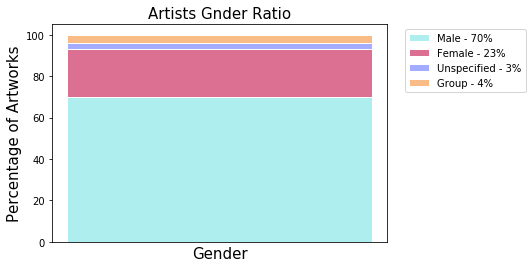

In [21]:


index = 1
plt.bar(index, m, color = '#AFEEEE', edgecolor = 'white', width=0.25, align='center')
plt.bar(index, f, bottom = m, color = '#DB7093', edgecolor = 'white', width=0.25, align='center')
plt.bar(index, u, bottom = m+f, color='#a3acff', edgecolor = 'white', width=0.25, align='center')
plt.bar(index, g, bottom = m+f+u, color= '#f9bc86', edgecolor = 'white', width=0.25, align='center')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Percentage of Artworks', fontsize=15)
plt.title('Artists Gnder Ratio', fontsize=15)
plt.gca().legend(('Male - 70%','Female - 23%', 'Unspecified - 3%', 'Group - 4%'), bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks([])
plt.show()

## Artworks Dataset

In [22]:
artworks = pd.read_csv('artworks_VideoMuseum.csv', dtype = 'object')


In [23]:
artworks['Id artists'].isnull().sum(axis = 0)

38

## Artists ID is missing for some artworks
## What is 's.d.' in Date creation?

In [24]:
artworks[artworks['Id artists'].isnull()].head()

,Id artwork,Id artists,Title,Domaine,Mode acquisition (original),Mode acquisition (new categories),Details acquisition (ex: name of leg),Year acquisition,Date creation (original),Year creation,Diff acquisition-creation in years
88,190000000087602,NaN,NaN,Domaine non saisi,Mode d'acquisition non renseigné,Mode d'acquisition non renseigné,Acquisition,NaN,s.d.,NaN,NaN
89,190000000049683,NaN,NaN,Domaine non saisi,Mode d'acquisition non renseigné,Mode d'acquisition non renseigné,Acquisition,NaN,s.d.,NaN,NaN
90,190000000061257,NaN,NaN,Domaine non saisi,Mode d'acquisition non renseigné,Mode d'acquisition non renseigné,Acquisition,NaN,s.d.,NaN,NaN
91,140000001880353,NaN,NaN,Domaine non saisi,Achat,Achat,Achat aux artistes en 2011,2011,s.d.,NaN,NaN
92,510000000000642,NaN,NaN,Domaine non saisi,Mode d'acquisition non renseigné,Mode d'acquisition non renseigné,Acquisition,NaN,s.d.,NaN,NaN


In [25]:
type(artworks['Diff acquisition-creation in years'])

pandas.core.series.Series

## Find artworks that have more than one author

In [26]:
artworks['Id artists'].apply(lambda x: "|" in str(x)).value_counts()

False    7720
True       41
Name: Id artists, dtype: int64

In [27]:
artworks[artworks['Id artists'].apply(lambda x: "|" in str(x)) == True] 

,Id artwork,Id artists,Title,Domaine,Mode acquisition (original),Mode acquisition (new categories),Details acquisition (ex: name of leg),Year acquisition,Date creation (original),Year creation,Diff acquisition-creation in years
494,150000000014073,9000000000068069|9000000000068068,Cinecité,Cinéma,Achat,Achat,Achat aux artistes en 1975,1975,1973 - 1974,1973,2
496,150000000059942,150000000000893|150000000000710,Chauffeuse,Objet/Design,Achat,Achat,Achat à M. Jérôme Rol en 2009,2009,1963,1963,46
531,150000000034279,9000000000079495|9000000000076125,Anthologie de performances,Nouveaux médias,Achat,Achat,Achat en 1991,1991,1975 - 1980,1975,16
532,80000000001011,9000000000079495|9000000000076125,The Van,Oeuvre en 3 dimensions,Don,Don,Don des artistes en 2001,2001,1977,1977,24
533,150000000034280,9000000000079495|9000000000076125,City of Angels,Nouveaux médias,Achat,Achat,Achat en 1989,1989,1983,1983,6
534,150000000034281,9000000000079495|9000000000076125,Terra Degli Dea Madre,Nouveaux médias,Achat,Achat,Achat en 1989,1989,1984,1984,5
665,150000000044503,9000000000085148|9000000000065381,Interiors & Furniture,Nouveaux médias,Achat,Achat,Achat à l' Acconci Studio en 2005,2005,2004,2004,1
666,150000000044504,9000000000085148|9000000000065381,"Buildings, Streets & Plazzas",Nouveaux médias,Achat,Achat,Achat à l' Acconci Studio en 2005,2005,2004,2004,1
667,150000000044505,9000000000085148|9000000000065381,Parks & Outlands,Nouveaux médias,Achat,Achat,Achat à l' Acconci Studio en 2005,2005,2004,2004,1
1378,140000000065824,9000000000067279|9000000000065391,Erdhexen\r\n(Les sorcières terrestres),Oeuvre en 3 dimensions,Achat,Achat,Achat à la Galerie Beaubourg en 1992,1992,1991,1991,1


In [28]:
# Mark gender as 'groupe' for artworks that have more than one artist id
artworks.loc[artworks['Id artists'].apply(lambda x: "|" in str(x)) == True, 'Artist_Gender'] = 'groupe'

In [29]:
artworks[artworks['Artist_Gender'] == 'groupe']

,Id artwork,Id artists,Title,Domaine,Mode acquisition (original),Mode acquisition (new categories),Details acquisition (ex: name of leg),Year acquisition,Date creation (original),Year creation,Diff acquisition-creation in years,Artist_Gender
494,150000000014073,9000000000068069|9000000000068068,Cinecité,Cinéma,Achat,Achat,Achat aux artistes en 1975,1975,1973 - 1974,1973,2,groupe
496,150000000059942,150000000000893|150000000000710,Chauffeuse,Objet/Design,Achat,Achat,Achat à M. Jérôme Rol en 2009,2009,1963,1963,46,groupe
531,150000000034279,9000000000079495|9000000000076125,Anthologie de performances,Nouveaux médias,Achat,Achat,Achat en 1991,1991,1975 - 1980,1975,16,groupe
532,80000000001011,9000000000079495|9000000000076125,The Van,Oeuvre en 3 dimensions,Don,Don,Don des artistes en 2001,2001,1977,1977,24,groupe
533,150000000034280,9000000000079495|9000000000076125,City of Angels,Nouveaux médias,Achat,Achat,Achat en 1989,1989,1983,1983,6,groupe
534,150000000034281,9000000000079495|9000000000076125,Terra Degli Dea Madre,Nouveaux médias,Achat,Achat,Achat en 1989,1989,1984,1984,5,groupe
665,150000000044503,9000000000085148|9000000000065381,Interiors & Furniture,Nouveaux médias,Achat,Achat,Achat à l' Acconci Studio en 2005,2005,2004,2004,1,groupe
666,150000000044504,9000000000085148|9000000000065381,"Buildings, Streets & Plazzas",Nouveaux médias,Achat,Achat,Achat à l' Acconci Studio en 2005,2005,2004,2004,1,groupe
667,150000000044505,9000000000085148|9000000000065381,Parks & Outlands,Nouveaux médias,Achat,Achat,Achat à l' Acconci Studio en 2005,2005,2004,2004,1,groupe
1378,140000000065824,9000000000067279|9000000000065391,Erdhexen\r\n(Les sorcières terrestres),Oeuvre en 3 dimensions,Achat,Achat,Achat à la Galerie Beaubourg en 1992,1992,1991,1991,1,groupe


In [30]:
artworks['Diff acquisition-creation in years'] = pd.to_numeric(artworks['Diff acquisition-creation in years'])

In [31]:
diff = (artworks['Diff acquisition-creation in years']).dropna()
diff.value_counts().sort_index()

-20.0       1
-11.0       1
-10.0       1
-9.0        2
-6.0        1
-5.0        2
-4.0        2
-3.0        2
-2.0        8
-1.0       42
 0.0      624
 1.0      565
 2.0      251
 3.0      146
 4.0      127
 5.0       92
 6.0       63
 7.0       58
 8.0       57
 9.0       44
 10.0      48
 11.0      31
 12.0      38
 13.0      32
 14.0      31
 15.0      28
 16.0      33
 17.0      25
 18.0      22
 19.0      22
         ... 
 89.0       1
 91.0       2
 93.0       1
 94.0       2
 95.0       2
 96.0       9
 97.0       1
 98.0       2
 100.0      2
 101.0      5
 102.0      1
 105.0      3
 107.0      2
 108.0      1
 109.0      2
 110.0      1
 111.0      1
 112.0      1
 115.0      5
 116.0      4
 117.0      1
 118.0      1
 119.0      1
 120.0      3
 126.0      4
 134.0      3
 135.0      1
 136.0      1
 145.0      2
 202.0      1
Name: Diff acquisition-creation in years, Length: 129, dtype: int64

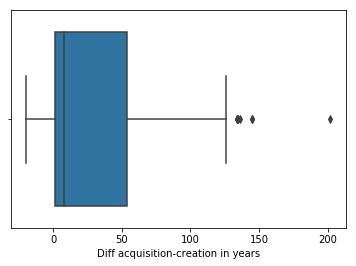

In [33]:
import seaborn as sns
sns.boxplot(diff)

In [36]:
# Add levels to creation-acquisition difference
artworks.loc[artworks['Diff acquisition-creation in years'] <= 0, 'Diff_CA'] = '<= 0'
artworks.loc[artworks['Diff acquisition-creation in years'].apply(lambda x: x>=0 and x<10) == True, 'Diff_CA'] = '0-10'
artworks.loc[artworks['Diff acquisition-creation in years'].apply(lambda x: x>=10 and x<20) == True, 'Diff_CA'] = '10-20'
artworks.loc[artworks['Diff acquisition-creation in years'].apply(lambda x: x>=20 and x<30) == True, 'Diff_CA'] = '20-30'
artworks.loc[artworks['Diff acquisition-creation in years'].apply(lambda x: x>=30 and x<40) == True, 'Diff_CA'] = '30-40'
artworks.loc[artworks['Diff acquisition-creation in years'].apply(lambda x: x>=40 and x<=50) == True, 'Diff_CA'] = '40-50'
artworks.loc[artworks['Diff acquisition-creation in years'].apply(lambda x: x>50 and x<=100) == True, 'Diff_CA'] = '50-100'
artworks.loc[artworks['Diff acquisition-creation in years']> 100, 'Diff_CA'] = '>100'

In [37]:
artworks['Diff_CA'].value_counts()

0-10      2027
50-100    1071
10-20      310
30-40      201
40-50      182
20-30      142
<= 0        62
>100        44
Name: Diff_CA, dtype: int64

## Should we exclude donations? Should we look only at 'Achat'?


In [38]:
artworks['Mode acquisition (new categories)'].value_counts()

Don                                              2976
Achat                                            2259
Mode d'acquisition non renseigné                 1073
Attribution                                       629
Donation                                          312
commande                                          303
Legs                                              111
Inscription à l'inventaire                         50
Commande publique                                  18
Dépôt entrant                                      15
Dation                                             12
Mode d'acquisition mixte                            2
Mode d'acquisition non renseigné par commande       1
Name: Mode acquisition (new categories), dtype: int64

## Does it matter if two different artworks from the same author have different creation/acquisition gap?

In [39]:
# function that adds artist's gender

def find_gender(x):
    if x != np.nan:
        gender = authors[authors['Id artist'] == x]['Gender']
        
        if len(gender) > 0:
            gender = gender.values[0]
            artworks.loc[artworks['Id artists'] == x, 'Artist_Gender'] = gender
    return x
    

In [ ]:
artworks['Id artists'].apply(lambda x: find_gender(x))

In [70]:
artworks.Artist_Gender = artworks.Artist_Gender.astype(str)

In [99]:
artworks.Artist_Gender.value_counts()

féminin          3467
masculin         3215
nan               879
groupe            165
non renseigné      35
Name: Artist_Gender, dtype: int64

In [184]:
artworks.Diff_CA.value_counts()

0-10      2027
50-100    1071
10-20      310
30-40      201
40-50      182
20-30      142
<= 0        62
>100        44
Name: Diff_CA, dtype: int64

In [100]:
artworks.Diff_CA.isna().sum()

3722

In [101]:
sum_diff = artworks.Diff_CA.value_counts().sum()
sum_diff

4039

In [90]:
artworks.shape

(7761, 13)

## Data both for gender and acquisition/creation difference 

In [115]:
sum = fem_sum + mas_sum + gr_sum + un_sum
sum

3878

## Percent of data on artworks that have data both for gender and acquisition/creation difference 

In [118]:
round(sum/len(artworks)*100)

50.0

In [240]:
#Artworks by female artists by gap between creation/acquisition
fem = artworks[artworks.Artist_Gender == 'féminin']['Diff_CA'].value_counts()
fem


50-100    811
0-10      366
40-50      78
30-40      68
10-20      67
20-30      22
>100       13
<= 0       10
Name: Diff_CA, dtype: int64

In [145]:
fem_sum = fem.sum()
fem_sum

1435

In [245]:
# Get percent of women by difference in creation/acquisition 
fem_per = artworks[artworks.Artist_Gender == 'féminin']['Diff_CA'].value_counts()
for i in range(len(fem_per)):
    fem_per[i]= round(fem_per[i]/fem_sum*100)

In [247]:
fem_per

50-100    57
0-10      26
40-50      5
30-40      5
10-20      5
20-30      2
>100       1
<= 0       1
Name: Diff_CA, dtype: int64

In [252]:
#Artworks by male artists by gap between creation/acquisition
mas = artworks[artworks.Artist_Gender == 'masculin']['Diff_CA'].value_counts()
mas


0-10      1557
10-20      225
50-100     160
30-40      116
20-30      112
40-50       76
<= 0        52
>100         7
Name: Diff_CA, dtype: int64

In [227]:
mas_sum = mas.sum()
mas_sum

2305

In [254]:
# Get percent of men by difference in creation/acquisition 
mas_per = artworks[artworks.Artist_Gender == 'masculin']['Diff_CA'].value_counts()
for i in range(len(mas_per)):
    mas_per[i]= round(mas_per[i]/mas_sum*100)

In [255]:
mas_per

0-10      68
10-20     10
50-100     7
30-40      5
20-30      5
40-50      3
<= 0       2
>100       0
Name: Diff_CA, dtype: int64

In [257]:
#Artworks by artists groups by gap between creation/acquisition
gr = artworks[artworks.Artist_Gender == 'groupe']['Diff_CA'].dropna().value_counts()
gr

0-10      77
50-100    27
40-50     12
30-40     10
10-20      5
20-30      1
Name: Diff_CA, dtype: int64

In [258]:
gr_sum = gr.sum()
gr_sum

132

In [259]:
# Get percent of artists groups by difference in creation/acquisition 
gr_per = artworks[artworks.Artist_Gender == 'groupe']['Diff_CA'].dropna().value_counts()
for i in range(len(gr_per)):
    gr_per[i]= round(gr_per[i]/gr_sum*100)

In [260]:
gr_per

0-10      58
50-100    20
40-50      9
30-40      8
10-20      4
20-30      1
Name: Diff_CA, dtype: int64

In [162]:
#Artworks by unknown gender artists by gap between creation/acquisition
un = artworks[artworks.Artist_Gender == 'non renseigné']['Diff_CA'].dropna().value_counts()
un

0-10     4
20-30    1
40-50    1
Name: Diff_CA, dtype: int64

In [163]:
un_sum = un.sum()
un_sum

6

In [261]:
# Get percent of unknown gender artists by difference in creation/acquisition 
un_per = artworks[artworks.Artist_Gender == 'non renseigné']['Diff_CA'].dropna().value_counts()
for i in range(len(un_per)):
    un_per[i]= round(un_per[i]/un_sum*100)

In [262]:
un_per

0-10     67
20-30    17
40-50    17
Name: Diff_CA, dtype: int64

In [318]:
#Total number of artworks in one of categories of difference in years creation/acquisition
cat_1 = mas['<= 0']+fem['<= 0']
cat_2 = mas['0-10']+fem['0-10']+gr['0-10']+un['0-10']
cat_3 = mas['10-20']+fem['10-20']+gr['10-20']
cat_4 = mas['20-30']+fem['20-30']+gr['20-30']+un['20-30']
cat_5 = mas['30-40']+fem['30-40']+gr['30-40']
cat_6 = mas['40-50']+fem['40-50']+gr['40-50']+un['40-50']
cat_7 = mas['50-100']+fem['50-100']+gr['50-100']
cat_8 = mas['>100']+fem['>100']

Text(0.5,1.12,'Number of Artworks by Creation/Acquisition Gap')

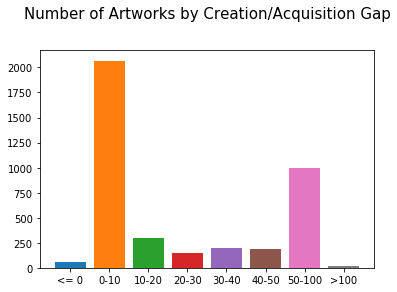

In [331]:
index =[1,2,3,4,5,6,7,8]
plt.bar(index[0], cat_1)
plt.bar(index[1], cat_2)
plt.bar(index[2], cat_3)
plt.bar(index[3], cat_4)
plt.bar(index[4], cat_5)
plt.bar(index[5], cat_6)
plt.bar(index[6], cat_7)
plt.bar(index[7], cat_8)
plt.xticks(index, ['<= 0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '>100'])
plt.title('Number of Artworks by Creation/Acquisition Gap', fontsize=15, y=1.12)

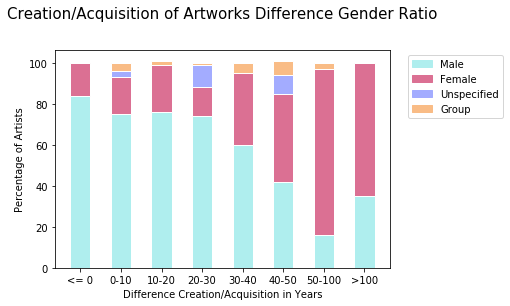

In [296]:
index =[1,2,3,4,5,6,7,8]
#percentage of male among diff = '<= 0'
plt.bar(index[0], round(mas['<= 0']/cat_1*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '<= 0'
plt.bar(index[0], round(fem['<= 0']/cat_1*100), bottom = round(mas['<= 0']/cat_1*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')


#percentage of male among diff = '0-10'
plt.bar(index[1], round(mas['0-10']/cat_2*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '0-10'
plt.bar(index[1], round(fem['0-10']/cat_2*100), bottom = round(mas['0-10']/cat_2*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')
#percentage of unknown gender artists among diff = '0-10'
plt.bar(index[1], round(un['0-10']/cat_2*100), bottom = round(mas['0-10']/cat_2*100) + round(fem['0-10']/cat_2*100) , color='#a3acff', edgecolor = 'white', width=0.5, align='center')
#percentage of artists groups among diff = '0-10'
plt.bar(index[1], round(gr['0-10']/cat_2*100), bottom = round(mas['0-10']/cat_2*100) + round(fem['0-10']/cat_2*100)+round(un['0-10']/cat_2*100), color= '#f9bc86', edgecolor = 'white', width=0.5, align='center')        


#percentage of male among diff = '10-20'
plt.bar(index[2], round(mas['10-20']/cat_3*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '10-20'
plt.bar(index[2], round(fem['10-20']/cat_3*100), bottom = round(mas['10-20']/cat_3*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')
#percentage of artists groups among diff = '10-20'
plt.bar(index[2], round(gr['10-20']/cat_3*100), bottom = round(mas['10-20']/cat_3*100) + round(fem['10-20']/cat_3*100), color= '#f9bc86', edgecolor = 'white', width=0.5, align='center')        


#percentage of male among diff = '20-30'
plt.bar(index[3], round(mas['20-30']/cat_4*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '20-30'
plt.bar(index[3], round(fem['20-30']/cat_4*100), bottom = round(mas['20-30']/cat_4*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')
#percentage of unknown gender artists among diff = '20-30'
plt.bar(index[3], round(un['20-30']/cat_4*100), bottom = round(mas['20-30']/cat_4*100) + round(fem['20-30']/cat_4*100) , color='#a3acff', edgecolor = 'white', width=0.5, align='center')
#percentage of artists groups among diff = '20-30'
plt.bar(index[3], round(gr['20-30']/cat_4*100), bottom = round(mas['20-30']/cat_4*100) + round(fem['20-30']/cat_4*100)+round(un['20-30']/cat_4*100), color= '#f9bc86', edgecolor = 'white', width=0.5, align='center')        


#percentage of male among diff = '30-40'
plt.bar(index[4], round(mas['30-40']/cat_5*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '30-40'
plt.bar(index[4], round(fem['30-40']/cat_5*100), bottom = round(mas['30-40']/cat_5*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')
#percentage of artists groups among diff = '30-40'
plt.bar(index[4], round(gr['30-40']/cat_5*100), bottom = round(mas['30-40']/cat_5*100) + round(fem['30-40']/cat_5*100), color= '#f9bc86', edgecolor = 'white', width=0.5, align='center')        


#percentage of male among diff = '40-50'
plt.bar(index[5], round(mas['40-50']/cat_6*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '40-50'
plt.bar(index[5], round(fem['40-50']/cat_6*100), bottom = round(mas['40-50']/cat_6*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')
#percentage of unknown gender artists among diff = '40-50'
plt.bar(index[5], round(un['40-50']/cat_6*100), bottom = round(mas['40-50']/cat_6*100) + round(fem['40-50']/cat_6*100) , color='#a3acff', edgecolor = 'white', width=0.5, align='center')
#percentage of artists groups among diff = '40-50'
plt.bar(index[5], round(gr['40-50']/cat_6*100), bottom = round(mas['40-50']/cat_6*100) + round(fem['40-50']/cat_6*100)+round(un['40-50']/cat_6*100), color= '#f9bc86', edgecolor = 'white', width=0.5, align='center')        

#percentage of male among diff = '50-100'
plt.bar(index[6], round(mas['50-100']/cat_7*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '50-100'
plt.bar(index[6], round(fem['50-100']/cat_7*100), bottom = round(mas['50-100']/cat_7*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')
#percentage of artists groups among diff = '50-100'
plt.bar(index[6], round(gr['50-100']/cat_7*100), bottom = round(mas['50-100']/cat_7*100) + round(fem['50-100']/cat_7*100), color= '#f9bc86', edgecolor = 'white', width=0.5, align='center')        


#percentage of male among diff = '50-100'
plt.bar(index[6], round(mas['50-100']/cat_7*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '50-100'
plt.bar(index[6], round(fem['50-100']/cat_7*100), bottom = round(mas['50-100']/cat_7*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')
#percentage of artists groups among diff = '50-100'
plt.bar(index[6], round(gr['50-100']/cat_7*100), bottom = round(mas['50-100']/cat_7*100) + round(fem['50-100']/cat_7*100), color= '#f9bc86', edgecolor = 'white', width=0.5, align='center')        


#percentage of male among diff = '>100'
plt.bar(index[7], round(mas['>100']/cat_8*100), color = '#AFEEEE', edgecolor = 'white', width=0.5, align='center')
#percentage of female among diff = '50-100'
plt.bar(index[7], round(fem['>100']/cat_8*100), bottom = round(mas['>100']/cat_8*100), color = '#DB7093', edgecolor = 'white', width=0.5, align='center')


plt.xlabel('Difference Creation/Acquisition in Years', fontsize=10)
plt.ylabel('Percentage of Artists', fontsize=10)
plt.title('Creation/Acquisition of Artworks Difference Gender Ratio', fontsize=15, y=1.12)
legend = plt.legend(['Male','Female', 'Unspecified', 'Group'], bbox_to_anchor=(1.04,1), loc="upper left")
hand = legend.legendHandles
hand[0].set_color('#AFEEEE')
hand[1].set_color('#DB7093')
hand[2].set_color('#a3acff')
hand[3].set_color('#f9bc86')
plt.xticks(index, ['<= 0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '>100'])
plt.show()

## Mistakes???
##seperate <0 from == 0?

In [298]:
artworks[artworks.Diff_CA == '<= 0']

,Id artwork,Id artists,Title,Domaine,Mode acquisition (original),Mode acquisition (new categories),Details acquisition (ex: name of leg),Year acquisition,Date creation (original),Year creation,Diff acquisition-creation in years,Artist_Gender,Diff_CA
284,320000000000665,9000000000068399,Marée Mauve,Reproduction photomécanique,Achat,Achat,Achat à l'artiste en 1998,1998,2000,2000,-2.0,féminin,<= 0
425,140000000072238,140000000004221,L'Adoration des bergers,Peinture,Achat par commande,commande,Achat par commande à l'artiste en 1850,1850,1851,1851,-1.0,masculin,<= 0
578,140000000078655,140000000003389,Les Disciples d'Emmaüs,Peinture,Achat par commande,commande,Achat par commande à l'artiste en 1849,1849,1850,1850,-1.0,masculin,<= 0
580,140000000083129,140000000003389,Empereur Napoléon III,Peinture,Achat par commande,commande,Achat par commande à l'artiste en 1856,1856,1857,1857,-1.0,masculin,<= 0
684,140000000043334,9000000000065382,Henry-Marie Bouley,Sculpture,Achat par commande,commande,Achat par commande à l'artiste en 1903,1903,avant 1905,1905,-2.0,masculin,<= 0
685,140000000029401,9000000000065382,Henry-Marie Bouley,Sculpture,Achat par commande,commande,Achat par commande à l'artiste en 1904,1904,1905,1905,-1.0,masculin,<= 0
687,140000000061908,9000000000065382,Silène surpris par les bergers,Sculpture,Achat par commande,commande,Achat par commande à l'artiste en 1909,1909,vers 1910,1910,-1.0,masculin,<= 0
688,140000000050228,9000000000065382,Maréchal Exelmans,Sculpture,Achat par commande,commande,Achat par commande à l'artiste en 1928,1928,1934,1934,-6.0,masculin,<= 0
758,250000000008193,9000000000076783,Vieux-Strasbourg,Estampe,Achat,Achat,Achat à l'artiste en 1903,1903,1904,1904,-1.0,masculin,<= 0
772,250000000008269,9000000000076783,Kaysersberg,Estampe,Achat,Achat,Achat à l'artiste en 1903,1903,1912,1912,-9.0,masculin,<= 0
